In [90]:
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'1.9.0'

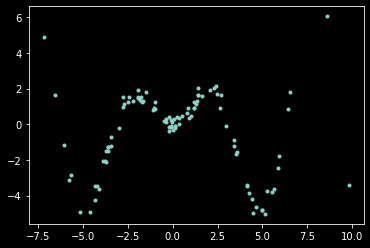

In [91]:
N = 100
x_train = 0 + np.pi*1.0 * np.random.randn(N)

def generate_data(x_train):
    y_train = x_train*np.sin(x_train) + 0.3*np.random.randn(len(x_train))
    return y_train
    
y_train = generate_data(x_train)
plt.plot(x_train,y_train,'.')

In [92]:
p = 10
X_train = np.array([x_train**i for i in range(0,p)]).transpose()

In [113]:
X_train.shape

(100, 10)

Refer to [Wikipedia](https://en.wikipedia.org/wiki/Ordinary_least_squares#Normal_equations) for further details and explanation.

For a given basis with $p$ functions $\{ \phi _{j}(x) \}_{j=1}^p$, we seek to find the coefficients of these functions such that we explain the data. We'll start by assuming a simple monomial basis with $\phi_{j}(x) = x^{j-1} , \quad \forall j \in \{1,2,...,p\}$.

With $y \in \mathbb{R}^N$, $X \in \mathbb{R}^{N \times p}$, find $\beta \in \mathbb{R}^p$ such that
$$ \mathbf{X} \beta = y $$

$$
\mathbf{X} =
\begin{bmatrix}
\phi_1 (x_1) & \phi_2 (x_1) & \phi_3 (x_1) &...    & \phi_p (x_1) \\
\phi_1 (x_2) & \phi_2 (x_2) & \phi_3 (x_2) &...    & \phi_p (x_2) \\
\vdots       & \vdots       & \vdots       &\ddots & \vdots       \\
\phi_1 (x_N) & \phi_2 (x_N) & \phi_3 (x_N) &...    & \phi_p (x_N) \\
\end{bmatrix}
=
\begin{bmatrix}
1 & x_1 & x_1^2 &...    & x_1^{p-1} \\
1 & x_2 & x_2^2 &...    & x_2^{p-1} \\
\vdots & \vdots & \vdots       & \ddots & \vdots       \\
1 & x_N & x_N^2 &...    & x_N^{p-1} \\
\end{bmatrix}
$$

The system is likely overdetermined - there are too many equations (rows) to satisfy, and not enough unknowns ($\beta$) (columns) for this to be done. Instead, we can try to choose $\beta$ so that we are as "close" as possible to satisfying the equations. To define what being "close" means, we need to have a notion of distance between objects. For least squares regression, we choose this distance as measured by the $L^2$ norm, or the Euclidean norm. Formally, let us choose $\beta$ such that
$$
    \arg \min_\beta || y - \mathbf{X} \beta ||_2 = \arg \min_\beta || y - \mathbf{X} \beta ||^2_2
$$

Where for the equality, we have used the fact that the minimum of $|z|$ occurs at the same location as the minimum of $|z|^2$. The objective above is convex in $\beta$, so a minimum is realized when the gradient of the objective with respect to $\beta$ is zero. Doing this yields the normal equations:
$$
(\mathbf{X}^T \mathbf{X}) \beta = \mathbf{X} ^T y
$$

If $\mathbf{X}$ has linearly independent columns, $\mathbf{X}^T \mathbf{X}$ is invertible and the choice of $\beta$ is unique. However, as a numerical analyst will warn, we do not to invert this matrix directly. Instead, we will just solve the system for $\beta$.

[ 2.11092281e-01  4.07310965e-01  6.40518715e-01 -1.24776717e-01
 -9.51643724e-02  1.00208974e-02  3.18576878e-03 -2.88380051e-04
 -2.99571721e-05  2.69910507e-06]


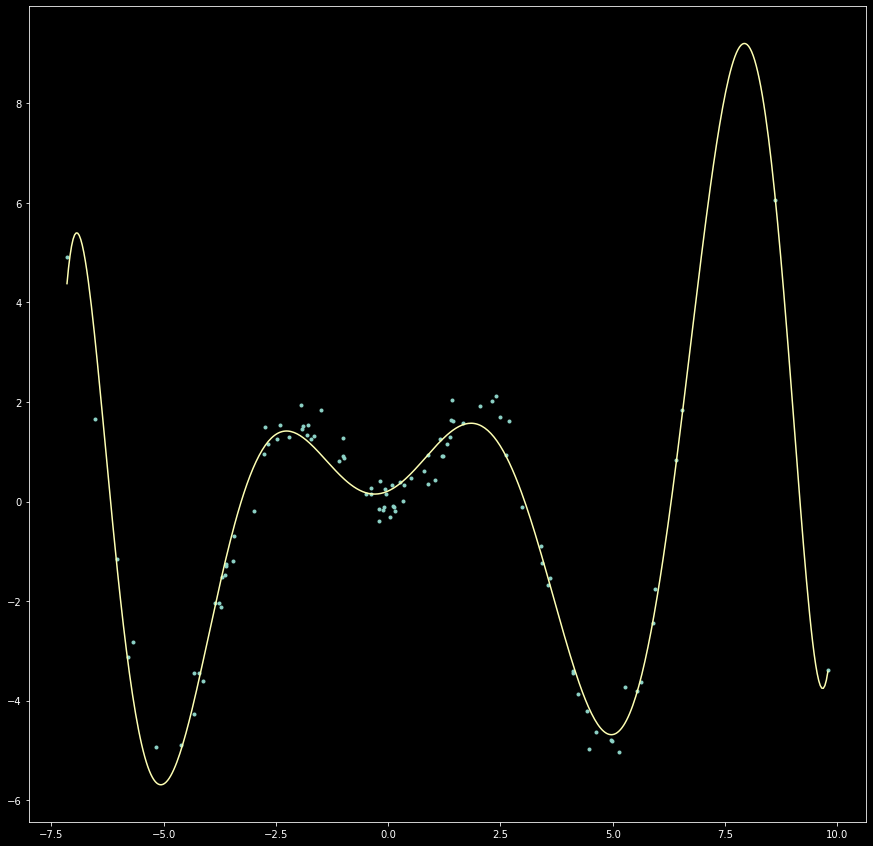

In [115]:
beta = np.linalg.solve(X_train.T @ X_train,X_train.T @ y_train)
# beta_inv = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
# print((beta-beta_inv)/beta)
print(beta)

def y_fun(beta,x_train):
    X_train = np.array([x_train**i for i in range(0,p)]).transpose()
    y_pred = X_train @ beta
    return y_pred

x_grid = np.linspace(np.min(x_train),np.max(x_train),500)
y_pred = y_fun(beta,x_grid)

plt.figure(figsize=(15,15))
plt.plot(x_train,y_train,'.')
plt.plot(x_grid,y_pred,'-')

We can choose other bases too.

$$
\phi_j (x)
\begin{cases}
    & \cos(\frac{j \cdot x}{10}), \quad j \text{ even}\\
    & \sin(\frac{j \cdot x}{10}), \quad j \text{ odd}
\end{cases} \quad \forall j \in \{ 1,2,...,p \}
$$

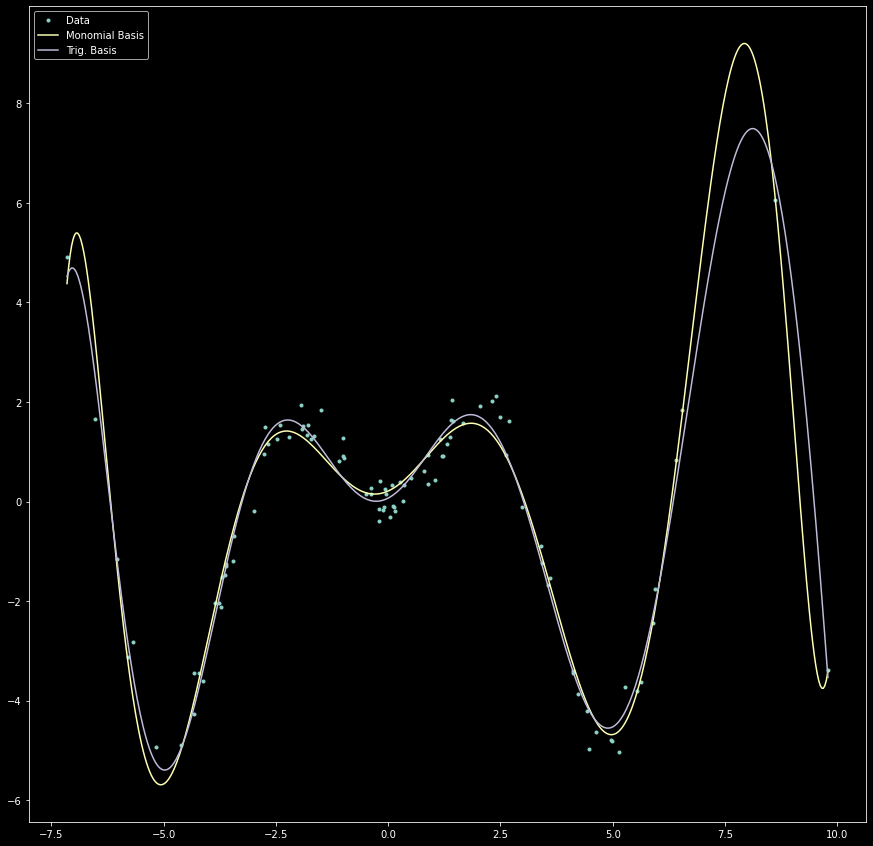

In [117]:
p = 10

phi = lambda x_train : np.array([x_train**i for i in range(0,p)]).transpose()
phi_sin = lambda x_train : np.array([np.sin(x_train*i/10)*(i%2==1) + \
    np.cos(x_train*i/10)*(i%2==0) for i in range(0,p)]).transpose()

def y_fun(beta,x_train,phi):
    X_train_sin = phi(x_train)
    y_pred = X_train_sin @ beta
    return y_pred

def predict_y(x_train,y_train,phi):
    X_train = phi(x_train)
    beta = np.linalg.solve(X_train.T @ X_train,X_train.T @ y_train)
    y_pred = y_fun(beta,x_grid,phi)
    return y_pred

y_pred = predict_y(x_train,y_train,phi)
y_pred_sin = predict_y(x_train,y_train,phi_sin)

plt.figure(figsize=(15,15))
plt.plot(x_train,y_train,'.')
plt.plot(x_grid,y_pred,'-')
plt.plot(x_grid,y_pred_sin,'-')
plt.legend(('Data','Monomial Basis','Trig. Basis'))

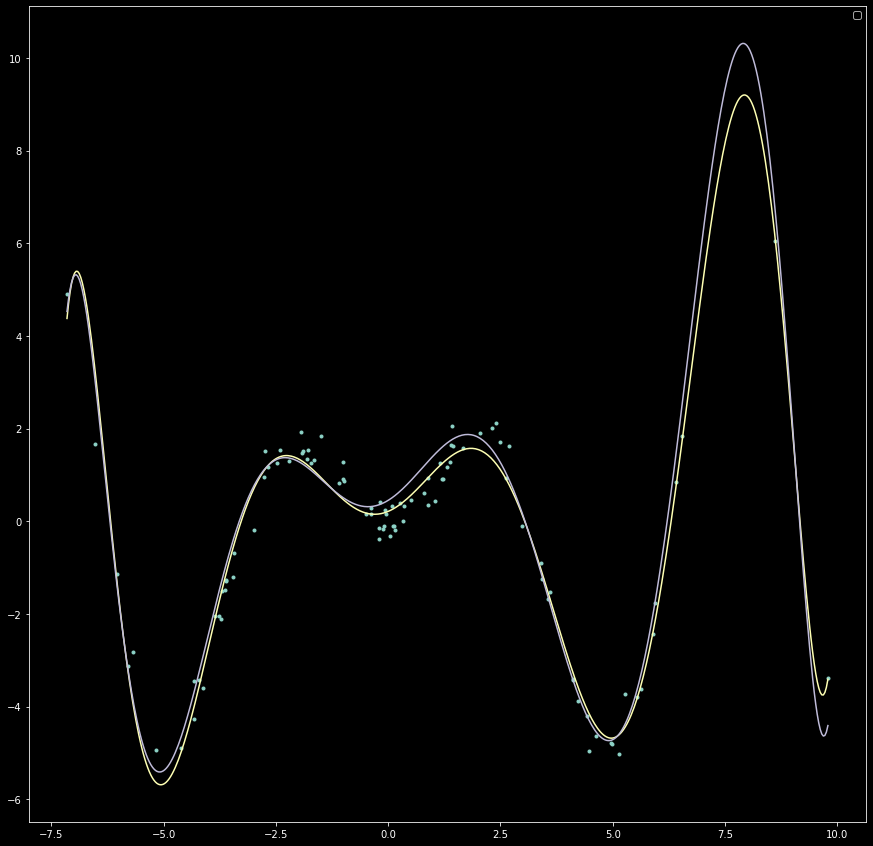

In [111]:
# How to use the fact that X_train has such a high condition number to show a flaw with this unnormalized method?

y_train_new = y_train + (1e-0)*np.random.randn(len(y_train))

y_pred_new = predict_y(x_train,y_train_new,phi)
y_pred_sin_new = predict_y(x_train,y_train,phi_sin)

plt.figure(figsize=(15,15))
plt.plot(x_train,y_train,'.')
plt.plot(x_grid,y_pred,'-')
# plt.plot(x_grid,y_pred_sin,'-')
plt.plot(x_grid,y_pred_new,'-')
# plt.plot(x_grid,y_pred_sin_new,'-')
plt.legend(())

In [97]:
# X_train_standardized = (X_train - X_train.min(axis = 1))/(max -  X_train.min(axis = 1)

In [98]:
# y_pred = a_0*X[:,0] + a_1*X[:,1] + ...
# loss = (y_pred - y_train)**2.mean()
# SGD for loop

In [99]:
# L2  = 0.5*(a_0**2 + a_1**2 + ...)
# loss = loss_MSE +  lambda*L2

In [100]:
# - d L2 / d (a_0) = - a_0